In [ ]:
import numpy as np 
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt 
import math

In [ ]:
img = cv2.imread('/content/Stop.jpg')

(719, 1439, 3)


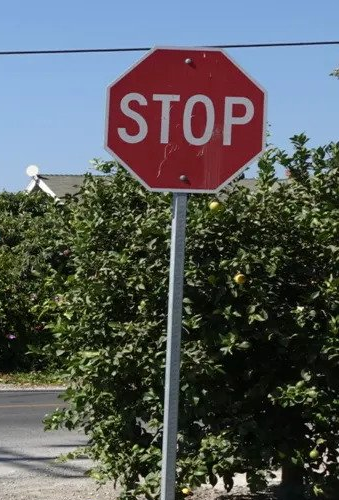

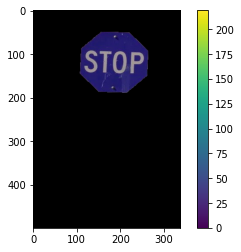

(<matplotlib.image.AxesImage at 0x7fdfe5f6f2d0>,
 None)

In [ ]:
print(img.shape) # Print image shape
# Cropping an image
cropped_image = img[0:500, 1100:1439]
# Display cropped image
cv2_imshow(cropped_image)
# Save the cropped image
cv2.imwrite("Cropped Image.jpg", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

mask = np.zeros(cropped_image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv2.grabCut(cropped_image,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
cropped_image = cropped_image*mask2[:,:,np.newaxis]
plt.imshow(cropped_image),plt.colorbar(),plt.show()


In [ ]:
def detection(img):
  cv2_imshow(img)
  # converting image into grayscale image
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #applying filters
  gray = cv2.GaussianBlur(gray,(5,5),0)
  canny = cv2.Canny(gray,100,180)
  cv2_imshow(canny)  
  # setting threshold of gray image
  _, threshold = cv2.threshold(canny, 127, 255, cv2.THRESH_BINARY)

  # using a findContours() function
  contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
  i = 0

  detect = False #flag for detection  
  # list for storing names of shapes
  for contour in contours:
    
      # here we are ignoring first counter because 
      # findcontour function detects whole image as shape
      if i == 0:
          i = 1
          continue
  
      approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        
      # using drawContours() function
      cv2.drawContours(img, [contour], 0, (0, 255, 0), 2)
    
      # finding center point of shape
      centerPoint = cv2.moments(contour)
      if centerPoint['m00'] != 0.0:
          x = int(centerPoint['m10']/centerPoint['m00'])
          y = int(centerPoint['m01']/centerPoint['m00'])

      cv2_imshow(img)  
      # putting shape name at center of each shape
      if len(approx) == 3:
          detect = True
          cv2.putText(img, 'Triangle', (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
          print("Be Careful, A Warning Sign")
          break
      elif len(approx) == 4:
          detect = True
          cv2.putText(img, 'Rectangle', (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
          print("Only one way")
          break
      elif len(approx) == 5:
          detect = True
          cv2.putText(img, 'Pentagon', (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
          print("School Zone Crossing")
          break
      elif len(approx) == 6:
          detect = True
          cv2.putText(img, 'Hexagon', (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
          print("Bus Stop")
          break
      elif len(approx) == 8: 
        detect = True
        cv2.putText(img, 'Octagon', (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
        print("Stop Sign")
        break
      else:
          detect = True
          cv2.putText(img, 'Circle', (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
          print("Speed limit OR Don't Enter")
          break
    
  # displaying the image after drawing contours
  cv2.waitKey(0)
  cv2.destroyAllWindows()

(500, 339, 3)


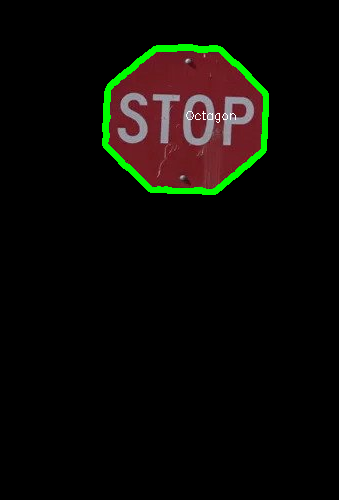

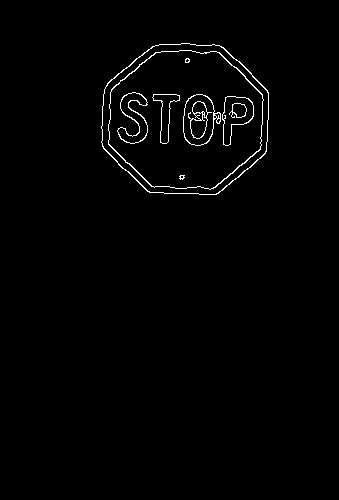

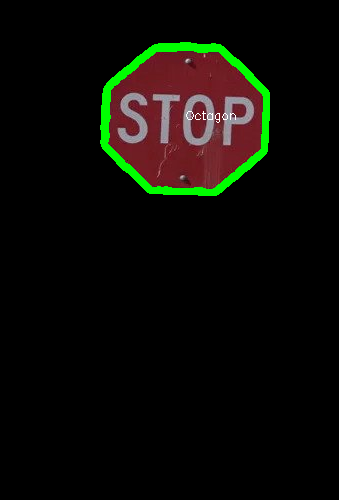

Stop Sign


In [ ]:
detection(cropped_image)

(2616, 3390, 3)


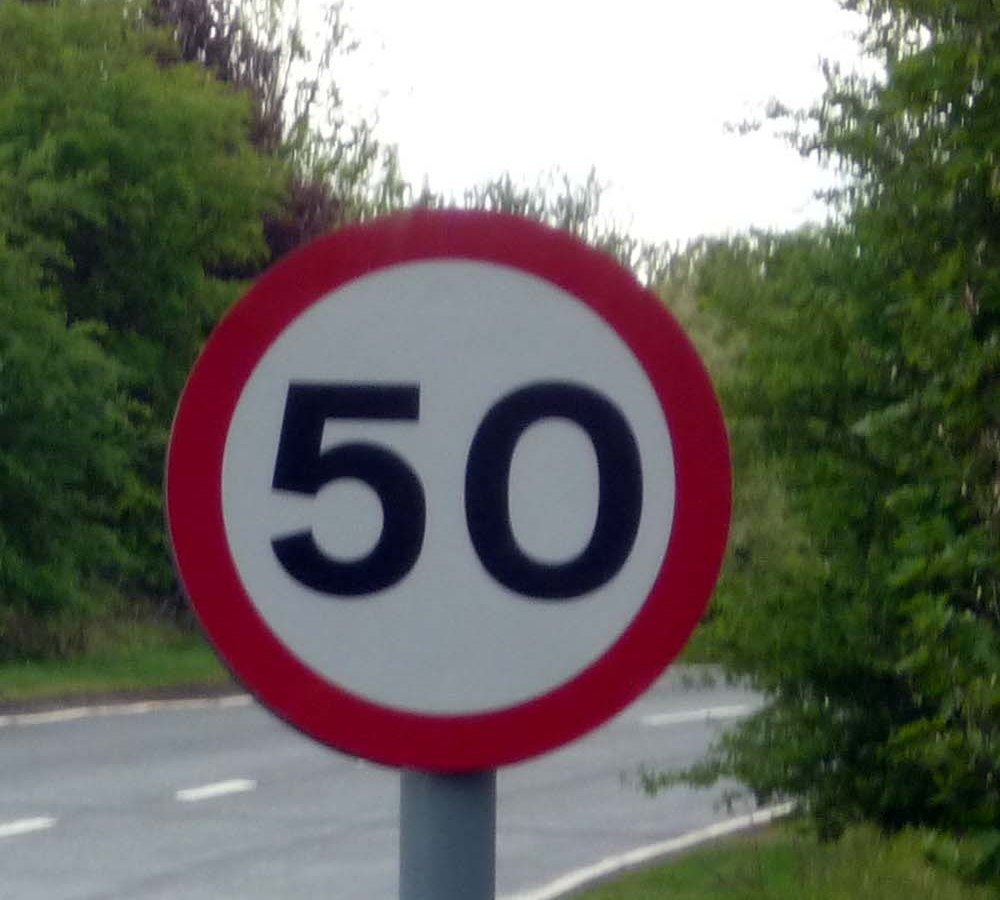

(900, 1000, 3)


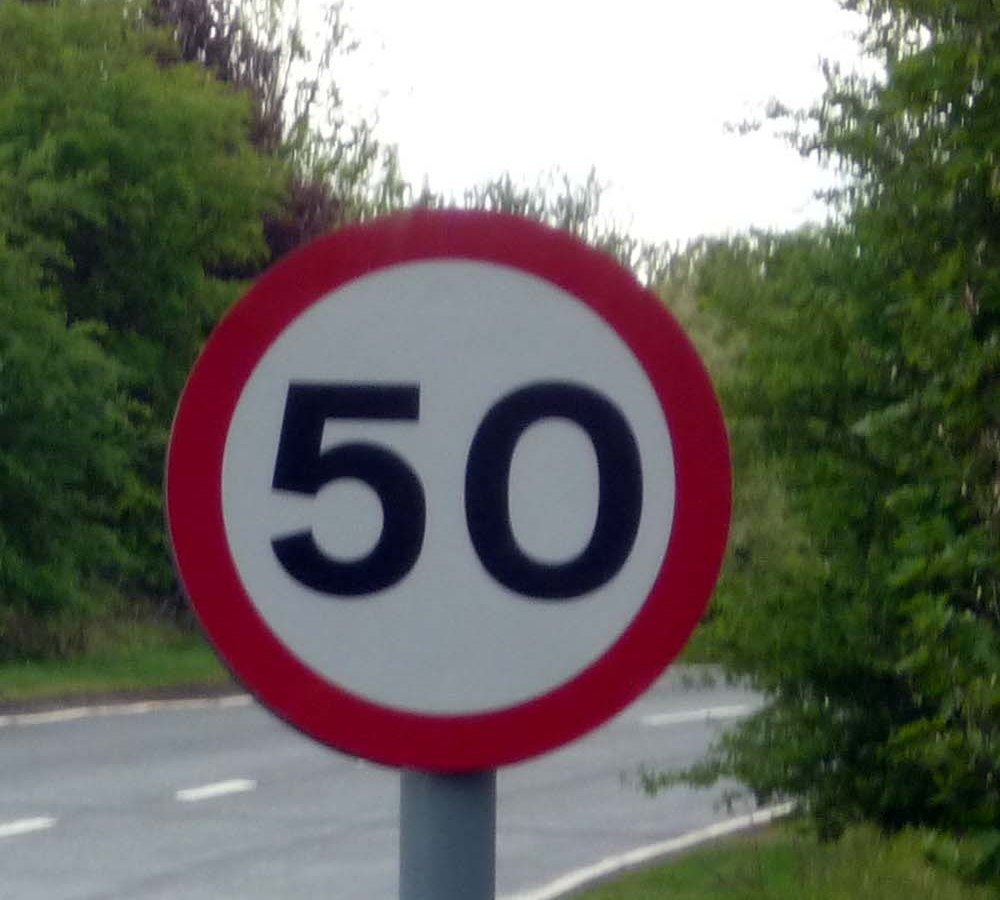

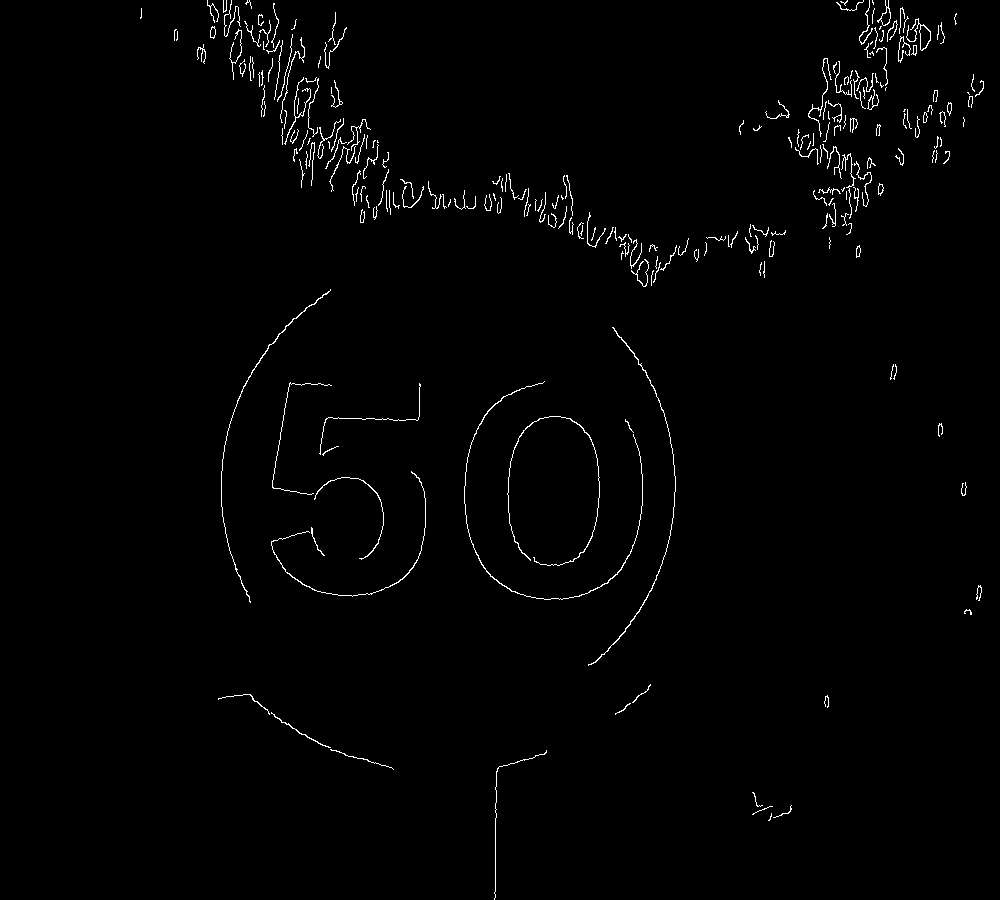

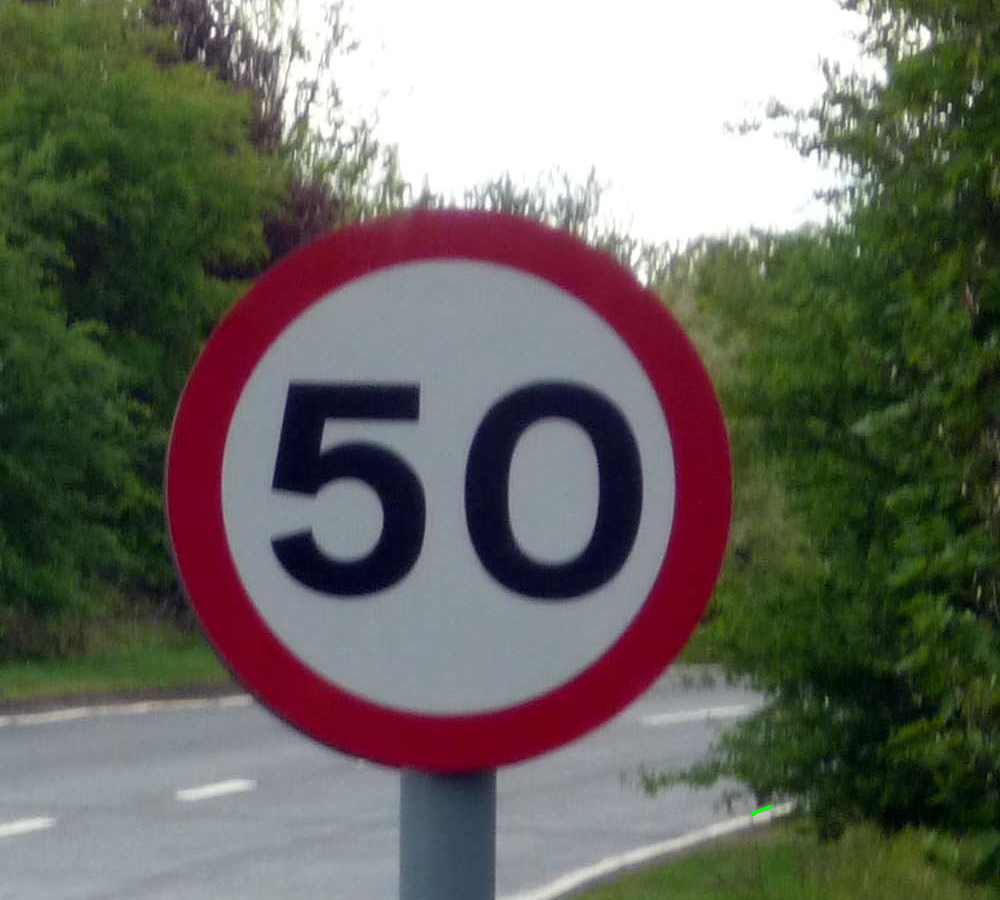

Speed limit OR Don't Enter


In [ ]:
img2= cv2.imread('/content/speedLimit.jpeg')
print(img2.shape) # Print image shape
# Cropping an image
cropped_image2 = img2[100:1000, 2000:3000]
# Display cropped image

cv2_imshow(cropped_image2)
# Save the cropped image
cv2.imwrite("Cropped Image2.jpg", cropped_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

detection(cropped_image2)